In [2]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import os

In [ ]:
file_location = r"D:/softwares/python_workspace/data/"
test_df = pd.read_csv(file_location + "test.csv", index_col='PassengerId')
train_df = pd.read_csv(file_location + "train.csv", index_col='PassengerId')

In [8]:
#perfrom EDA
# 1. find basic information of the frame
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [9]:
#from info we understand there is no survived dataset in test df, so lets add it so that both df have similar structure
test_df['Survived'] = -888


In [11]:
df = pd.concat([train_df, test_df], axis=0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [14]:
# selectively displaying columns
# df[['Sex', 'Age']]
# selectively displaying columns and a few rows only

df.loc[5:10, ['Sex', 'Age']]


,Sex,Age
PassengerId,,
5,male,35.0
6,male,NaN
7,male,54.0
8,male,2.0
9,female,27.0
10,female,14.0


In [16]:
# summary statistics
df.describe(include='all')

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [23]:
#centrality measures :-
print('mean fare:- {}'.format(df.Fare.mean()))
print('median fare:- {}'.format(df.Fare.median()))
print('range fare:- {}'.format(df.Fare.max() - df.Fare.min()))
print('25 %ile :- {}'.format(df.Fare.quantile(.25)))
print('50 %ile :- {}'.format(df.Fare.quantile(.5)))
print('75 %ile :- {}'.format(df.Fare.quantile(.75)))
print('variance fare:- {}'.format(df.Fare.var()))
print('std fare:- {}'.format(df.Fare.std()))

mean fare:- 33.2954792813456
median fare:- 14.4542
range fare:- 512.3292
25 %ile :- 7.8958
50 %ile :- 14.4542
75 %ile :- 31.275
variance fare:- 2678.959737892894
std fare:- 51.75866823917414


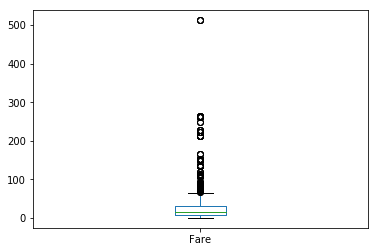

In [24]:
#understand the spread of data :- create box plot
df.Fare.plot(kind='box')

In [28]:
#analyse survived
df[df['Survived'] != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

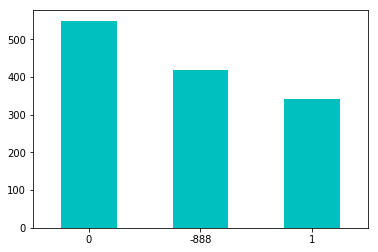

In [31]:
df.Survived.value_counts().plot(kind='bar', color='c', rot=0);